In this example we demonstrate calculation of the end state


In [1]:
using NLOptControl
using Polynomials
using Plots
using FastGaussQuadrature
pyplot()

Plots.PyPlotBackend()


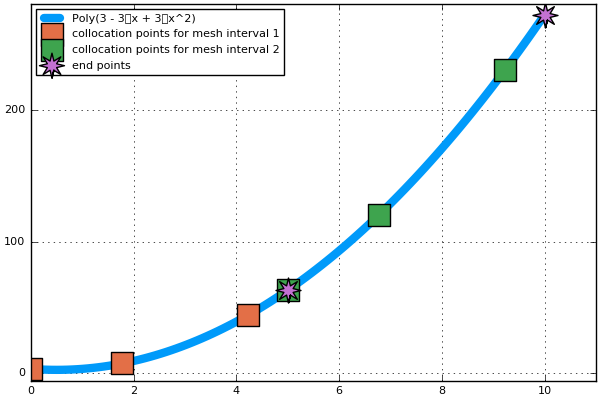

/home/febbo/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [2]:
# define problem
t0 = Float64(0); tf = Float64(10);  # TODO change and y to x
t = Array(linspace(t0,tf,100));
α₁ =  3; α₂ = -3; α₃ = -8; α₄ =  7;
Nc = Int64(3); # number of collocation points in each interval
Ni = Int64(2);  # number of intervals
####################################
# perform analytical calcualtions
####################################
γ = Poly([α₁,α₂,α₁]); #TODO check on that imported binding warning
y = polyval(γ,t);

# evaluate the integral
∫γ = polyint(γ);
Y = polyval(∫γ,t[end]) - polyval(∫γ,t[1]);
C = Y - polyval(∫γ,t[end]); # constant of integration
∫y = polyval(∫γ,t) + C;

# evaluate the derivative
dγ = polyder(γ);
dy = polyval(dγ,t);

####################################
# construct polynomial approximation
####################################
τ, ω = gaussradau(Nc); # number of collocation points per interval

# break the problem up into multiple intervals
di, tm, t_data, ωₛ = create_intervals(t0,tf,Ni,Nc,τ,ω); # TODO probably get ride of some of the output

temp = zeros(Float64,1,Ni)
for idx in 1:Ni
  temp[idx] = di*idx;
end
t_dataE = [t_data;temp];
# approximate state (or polynomial)
state_data = zeros(Float64,Nc+1,Ni); 
for idx in 1:Ni
  state_data[:,idx] = polyval(γ,t_dataE[:,idx]);
end
P = zeros(Float64,Nc+1,Ni);
for idx in 1:Ni
  P[:,idx] = interpolate_lagrange(t_dataE[:,idx],t_dataE[:,idx],state_data[:,idx],Nc)
end 
#################
# post processing
#################
tF = zeros(Float64,Ni); yF =  zeros(Float64,Ni);
plot(0,leg=:false);
plot!(t,y,label=string(γ),w=6)
for idx in 1:Ni
  scatter!(t_dataE[1:end-1,idx],P[1:end-1,idx],markersize =16,markershape = :rect,label=string("collocation points for mesh interval ",idx))
  tF[idx] = t_dataE[end,idx];
  yF[idx] = P[end,idx];
end
scatter!(tF,yF,markersize = 18,markershape = :star8,label=string("end points"))
xlims!(t0,tf*1.1)

In [3]:
savefig("test2a.png")

In [7]:
savefig("test1b.png")

# 

In [9]:
savefig("test3c.png")

# 

In [11]:
savefig("test1d.png")

In [17]:
savefig("test3e.png")